In [1]:
import pandas as pd # Load the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects
df = pd.read_csv('/content/passing_stats.csv', index_col=0) # Import the dataset
df.head()

,Player,Tm,Age,G,GS,Cmp,Att,Cmp%,Yds,TD,...,AY/A,Y/C,Y/G,Rate,Sk,Yds-s,Sk%,NY/A,ANY/A,Year
0,Kurt Warner,STL,30,16,16,375,546,68.7,4830,36,...,8.4,12.9,301.9,101.4,38,233,6.5,7.87,7.41,2001
1,Peyton Manning,IND,25,16,16,343,547,62.7,4131,26,...,6.6,12.0,258.2,84.1,29,232,5.0,6.77,5.88,2001
2,Brett Favre,GNB,32,16,16,314,510,61.6,3921,32,...,7.6,12.5,245.1,94.1,22,151,4.1,7.09,7.02,2001
3,Aaron Brooks,NOR,25,16,16,312,558,55.9,3832,26,...,6.0,12.3,239.5,76.4,50,330,8.2,5.76,4.99,2001
4,Rich Gannon,OAK,36,16,16,361,549,65.8,3828,27,...,7.2,10.6,239.3,95.5,27,155,4.7,6.38,6.61,2001


This dataset is from Kaggle, and the data is collected from pro-football-reference.com.  The data listed includes a wide array of NFL passing statistics from 2001 to 2023.  Some of the columns include player name, the team they played for, passing yards, attempts, completions, completion percentage, quarterback rating, touchdowns and interceptions.  All of these statistics factor into the value of each quarterback and how well they played.

There are several possible correlations I would like to explore within this vast dataset.  First, I would like to see how NFL passing statistics have changed over time.  This means studying the number of passing yards, touchdowns, interceptions and quarterback ratings from 2001-2023.

I would also like to see which teams have recorded the best passing statistics, especially the Washington Redskins/Commanders and the teams in the NFC East division.

Lastly, I want to conclude if there is a strong correlation between interceptions and quarterback rating, as well as touchdowns and passing yards.

Additionally, I want to answer the question, what is the median number of passing yards for all 32 teams over this time period?

I'm only interested in passing statistics from starting quarterbacks, so I'm going to delete the Games Played (G) column and keep the Games Started (GS) column, as well as filter the data in ways that remove non-quarterback players throughout this project.

In [2]:
df.drop('G', axis=1,inplace=True) # Remove Games Played column
df.head()

,Player,Tm,Age,GS,Cmp,Att,Cmp%,Yds,TD,TD%,...,AY/A,Y/C,Y/G,Rate,Sk,Yds-s,Sk%,NY/A,ANY/A,Year
0,Kurt Warner,STL,30,16,375,546,68.7,4830,36,6.6,...,8.4,12.9,301.9,101.4,38,233,6.5,7.87,7.41,2001
1,Peyton Manning,IND,25,16,343,547,62.7,4131,26,4.8,...,6.6,12.0,258.2,84.1,29,232,5.0,6.77,5.88,2001
2,Brett Favre,GNB,32,16,314,510,61.6,3921,32,6.3,...,7.6,12.5,245.1,94.1,22,151,4.1,7.09,7.02,2001
3,Aaron Brooks,NOR,25,16,312,558,55.9,3832,26,4.7,...,6.0,12.3,239.5,76.4,50,330,8.2,5.76,4.99,2001
4,Rich Gannon,OAK,36,16,361,549,65.8,3828,27,4.9,...,7.2,10.6,239.3,95.5,27,155,4.7,6.38,6.61,2001


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2350 entries, 0 to 2393
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  2350 non-null   object 
 1   Tm      2350 non-null   object 
 2   Age     2350 non-null   int64  
 3   GS      2350 non-null   int64  
 4   Cmp     2350 non-null   int64  
 5   Att     2350 non-null   int64  
 6   Cmp%    2350 non-null   float64
 7   Yds     2350 non-null   int64  
 8   TD      2350 non-null   int64  
 9   TD%     2350 non-null   float64
 10  Int     2350 non-null   int64  
 11  Int%    2350 non-null   float64
 12  1D      2350 non-null   int64  
 13  Lng     2350 non-null   int64  
 14  Y/A     2350 non-null   float64
 15  AY/A    2350 non-null   float64
 16  Y/C     2350 non-null   float64
 17  Y/G     2350 non-null   float64
 18  Rate    2350 non-null   float64
 19  Sk      2350 non-null   int64  
 20  Yds-s   2350 non-null   int64  
 21  Sk%     2350 non-null   float64
 22  NY/A 

In [4]:
df['TD-Int'] = df['TD'] - df['Int'] # Create a new column that calculates the difference between touchdowns and interceptions
df.head()

,Player,Tm,Age,GS,Cmp,Att,Cmp%,Yds,TD,TD%,...,Y/C,Y/G,Rate,Sk,Yds-s,Sk%,NY/A,ANY/A,Year,TD-Int
0,Kurt Warner,STL,30,16,375,546,68.7,4830,36,6.6,...,12.9,301.9,101.4,38,233,6.5,7.87,7.41,2001,14
1,Peyton Manning,IND,25,16,343,547,62.7,4131,26,4.8,...,12.0,258.2,84.1,29,232,5.0,6.77,5.88,2001,3
2,Brett Favre,GNB,32,16,314,510,61.6,3921,32,6.3,...,12.5,245.1,94.1,22,151,4.1,7.09,7.02,2001,17
3,Aaron Brooks,NOR,25,16,312,558,55.9,3832,26,4.7,...,12.3,239.5,76.4,50,330,8.2,5.76,4.99,2001,4
4,Rich Gannon,OAK,36,16,361,549,65.8,3828,27,4.9,...,10.6,239.3,95.5,27,155,4.7,6.38,6.61,2001,18


In [5]:
teams = df.groupby(['Year']) # Group by 'Tm' and 'Year' simultaneously
team_yards = teams['Yds'].mean() # Calculate the mean of 'Yds' for each group
team_yards = team_yards.sort_values(ascending=False) # Sort the results in descending order
full_data_string = team_yards.round(0).to_string() # Convert the sorted results to a string
print(full_data_string) # Print the entire sorted results

Year
2015    1543.0
2013    1520.0
2012    1482.0
2016    1363.0
2011    1306.0
2017    1305.0
2014    1289.0
2019    1264.0
2023    1236.0
2007    1236.0
2018    1229.0
2022    1198.0
2010    1186.0
2020    1165.0
2021    1155.0
2006    1146.0
2005    1140.0
2008    1114.0
2009    1101.0
2002    1086.0
2001    1025.0
2004    1003.0
2003     905.0


In [6]:
# Group data by team and calculate total passing yards for each team
team_total_yards = df.groupby('Tm')['Yds'].sum()
team_total_yards_sorted = team_total_yards.sort_values(ascending=False)
# Display the results
team_total_yards_sorted.head()
print("Total Passing Yards per Team:\n", team_total_yards_sorted)

Total Passing Yards per Team:
 Tm
NOR    101414
GNB     95398
IND     95078
NWE     93717
DET     93621
PHI     93223
TAM     92158
PIT     91389
KAN     91264
DAL     90755
ATL     90034
MIN     88201
DEN     88155
NYG     88072
CIN     88009
MIA     86741
SEA     86521
ARI     86031
WAS     85944
JAX     83644
HOU     83327
SFO     83196
BUF     82460
TEN     82279
CLE     81140
BAL     80391
CAR     79877
CHI     78216
NYJ     78003
OAK     66666
SDG     60441
STL     53741
LAR     37067
LAC     36492
LVR     20705
2TM     18138
3TM         0
Name: Yds, dtype: int64


In [7]:
touchdowns = df['TD'].to_numpy()      # Select 'TD' column as a NumPy array
interceptions = df['Int'].to_numpy()  # Select 'Int' column as a NumPy array

# Combine into a 2D array for easier processing
td_int_total = np.column_stack((touchdowns, interceptions))

print(td_int_total[:10])

[[36 22]
 [26 23]
 [32 15]
 [26 22]
 [27  9]
 [17 24]
 [19 16]
 [18 14]
 [32 12]
 [15 18]]


In [8]:
ratings = df['Rate'].to_numpy()  # Select the 'Rate' column as a NumPy array

# Create a boolean mask (array of True/False values)
high_ratings_mask = ratings > 100

# Apply the mask to filter the original DataFrame
filtered_df = df[high_ratings_mask]

# Now filtered_df contains only rows where the quarterback rating is above 100

In [9]:
# 1. Get the data:
ratings = df['Rate'].to_numpy()

# 2. Calculate the mean:
mean_rating = np.mean(ratings)

# 3. Calculate the standard deviation:
std_rating = np.std(ratings)

# Print the results:
print(f"Average Quarterback Rating: {mean_rating:.2f}")
print(f"Standard Deviation of Quarterback Rating: {std_rating:.2f}")

Average Quarterback Rating: 77.79
Standard Deviation of Quarterback Rating: 31.94


In [10]:
# 1. Filter data for 2001 and 2023:
ratings_2001 = df[df['Year'] == 2001]['Rate'].to_numpy()
ratings_2023 = df[df['Year'] == 2023]['Rate'].to_numpy()

# 2. Calculate statistics for 2001:
mean_2001 = np.mean(ratings_2001)
std_2001 = np.std(ratings_2001)

# 3. Calculate statistics for 2023:
mean_2023 = np.mean(ratings_2023)
std_2023 = np.std(ratings_2023)

# 4. Print the results:
print("2001 Quarterback Ratings:")
print(f"  Average: {mean_2001:.2f}")
print(f"  Standard Deviation: {std_2001:.2f}")

print("\n2023 Quarterback Ratings:")
print(f"  Average: {mean_2023:.2f}")
print(f"  Standard Deviation: {std_2023:.2f}")

# 5. Compare the results (optional):
print("\nComparison:")
print(f"  Change in Average: {mean_2023 - mean_2001:.2f}")
print(f"  Change in Standard Deviation: {std_2023 - std_2001:.2f}")

2001 Quarterback Ratings:
  Average: 78.10
  Standard Deviation: 34.73

2023 Quarterback Ratings:
  Average: 83.53
  Standard Deviation: 27.02

Comparison:
  Change in Average: 5.43
  Change in Standard Deviation: -7.71


<ipython-input-11-616096c5cfb2>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Rate', data=filtered_df, ci=None)


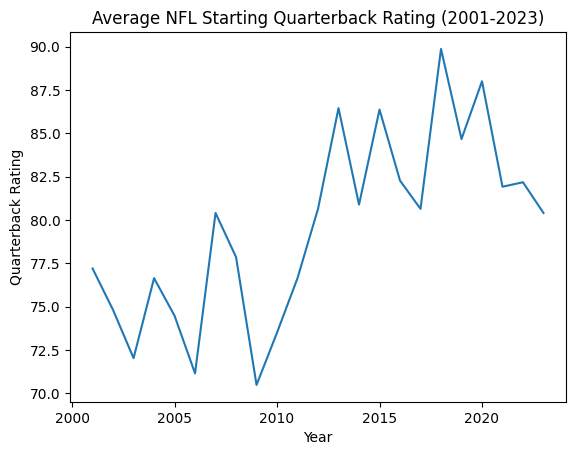

In [11]:
# 1. Filter for relevant data (quarterbacks with significant playing time)
filtered_df = df[(df['GS'] >= 1) & (df['GS'] <= 17)]

# 2. Create the line plot
sns.lineplot(x='Year', y='Rate', data=filtered_df, ci=None)

# 3. Customize the plot
plt.xlabel("Year")
plt.ylabel("Quarterback Rating")
plt.title("Average NFL Starting Quarterback Rating (2001-2023)")
plt.show()

Text(0.5, 1.0, 'Distribution of Quarterback Rating (2001-2023)')

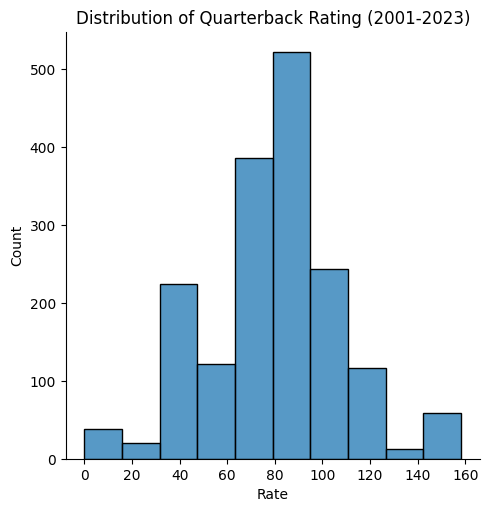

In [12]:
sns.displot(filtered_df['Rate'], kind='hist', bins=10)
plt.title("Distribution of Quarterback Rating (2001-2023)")

<ipython-input-13-69d8990a7186>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Yds', data=filtered_df, ci=None)


Text(0.5, 1.0, 'Average NFL Passing Yards (2001-2023)')

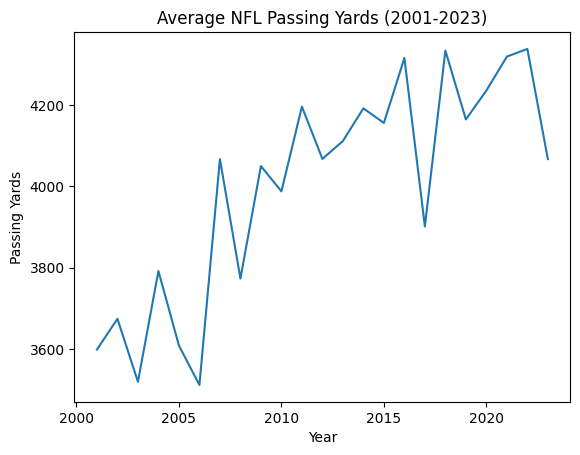

In [13]:
filtered_df = df[(df['GS'].isin([16, 17])) & (df['TD'] >= 5)]
sns.lineplot(x='Year', y='Yds', data=filtered_df, ci=None)
plt.xlabel("Year")
plt.ylabel("Passing Yards")
plt.title("Average NFL Passing Yards (2001-2023)") # Add a title

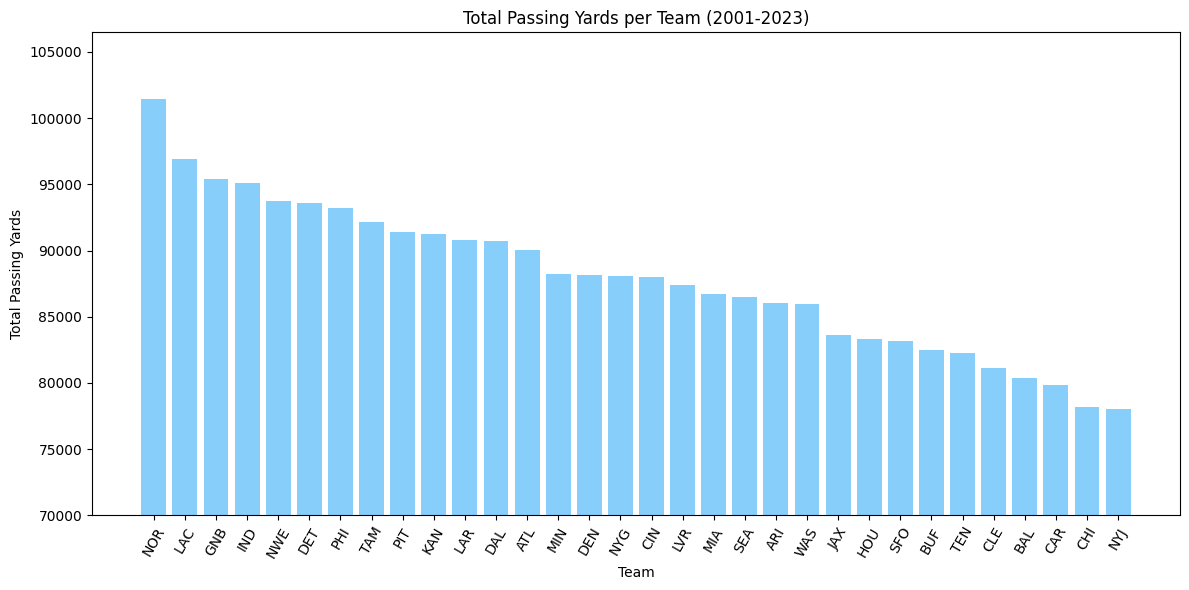

In [14]:
# Group data by team and calculate total passing yards for each team
team_total_yards = df.groupby('Tm')['Yds'].sum()

# Remove "2TM" and "3TM"
team_total_yards = team_total_yards.drop(index=['2TM', '3TM'])

# Combine LAC and SDG into LAC
team_total_yards['LAC'] = team_total_yards.get('LAC', 0) + team_total_yards.get('SDG', 0)
# Combine LVR and OAK into LVR
team_total_yards['LVR'] = team_total_yards.get('LVR', 0) + team_total_yards.get('OAK', 0)
# Combine LAR and STL into LAR
team_total_yards['LAR'] = team_total_yards.get('LAR', 0) + team_total_yards.get('STL', 0)

# Remove the original LAC, SDG, LVR, OAK, LAR, and STL bars
team_total_yards = team_total_yards.drop(index=['SDG', 'OAK', 'STL'])

# Sort the data
team_total_yards_sorted = team_total_yards.sort_values(ascending=False)

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(team_total_yards_sorted.index, team_total_yards_sorted.values, color='lightskyblue')
plt.xlabel("Team")
plt.ylabel("Total Passing Yards")
plt.title("Total Passing Yards per Team (2001-2023)")
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability

# Set y-axis limits
plt.ylim(bottom=70000)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

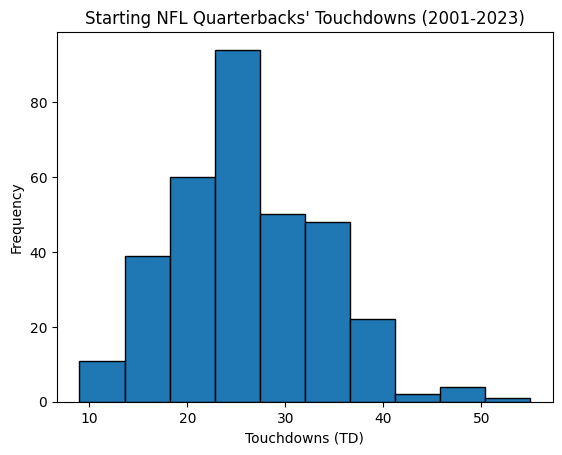

In [15]:
# Filter data for players who started 16 or 17 games AND had at least 5 TDs to eliminate non-quarterback positions
filtered_df = df[(df['GS'].isin([16, 17])) & (df['TD'] >= 5)]

# Create the histogram of touchdowns for the filtered data
plt.hist(filtered_df['TD'], bins=10, edgecolor='black')  # Adjust bins as needed
plt.xlabel("Touchdowns (TD)")
plt.ylabel("Frequency")
plt.title("Starting NFL Quarterbacks' Touchdowns (2001-2023)")
plt.show()

<ipython-input-16-3c60091f9d41>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='TD', data=filtered_df, label='Touchdowns', ci=None)
<ipython-input-16-3c60091f9d41>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Int', data=filtered_df, label='Interceptions', color='red', ci=None)


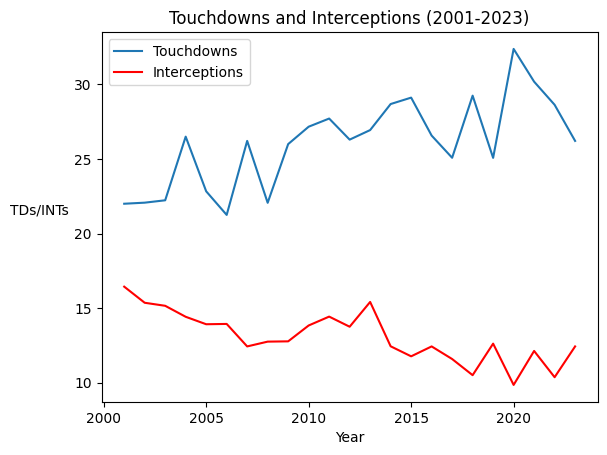

In [16]:
# Create the line plot with two lines (TD and Int)
sns.lineplot(x='Year', y='TD', data=filtered_df, label='Touchdowns', ci=None)
sns.lineplot(x='Year', y='Int', data=filtered_df, label='Interceptions', color='red', ci=None)

# Customize the plot
plt.xlabel("Year")
plt.ylabel("TDs/INTs", rotation=0, ha='right')
plt.title("Touchdowns and Interceptions (2001-2023)")
plt.legend()  # Show the legend to distinguish the lines
plt.show()

In [30]:
nfc_east = filtered_df_all_starts[df['Tm'].isin(['WAS', 'PHI', 'DAL', 'NYG'])] # Create a new dataset from our filtered_df that contains only NFC East teams (WAS, PHI, DAL, NYG)

<ipython-input-30-165ffe1c41e8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nfc_east = filtered_df_all_starts[df['Tm'].isin(['WAS', 'PHI', 'DAL', 'NYG'])] # Create a new dataset from our filtered_df that contains only NFC East teams (WAS, PHI, DAL, NYG)


<ipython-input-31-d975d3983926>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Tm', y='Rate', data=nfc_east, kind='box', palette=team_colors)


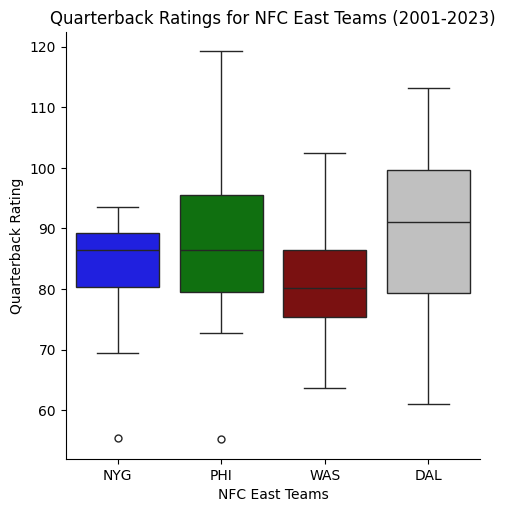

In [31]:
# Define a custom color palette
team_colors = {
    'NYG': 'blue',
    'PHI': 'green',
    'DAL': 'silver',
    'WAS': 'darkred'
}

# Create the catplot with the custom palette
sns.catplot(x='Tm', y='Rate', data=nfc_east, kind='box', palette=team_colors)
plt.xlabel("NFC East Teams")
plt.ylabel("Quarterback Rating")
plt.title("Quarterback Ratings for NFC East Teams (2001-2023)")
plt.show()

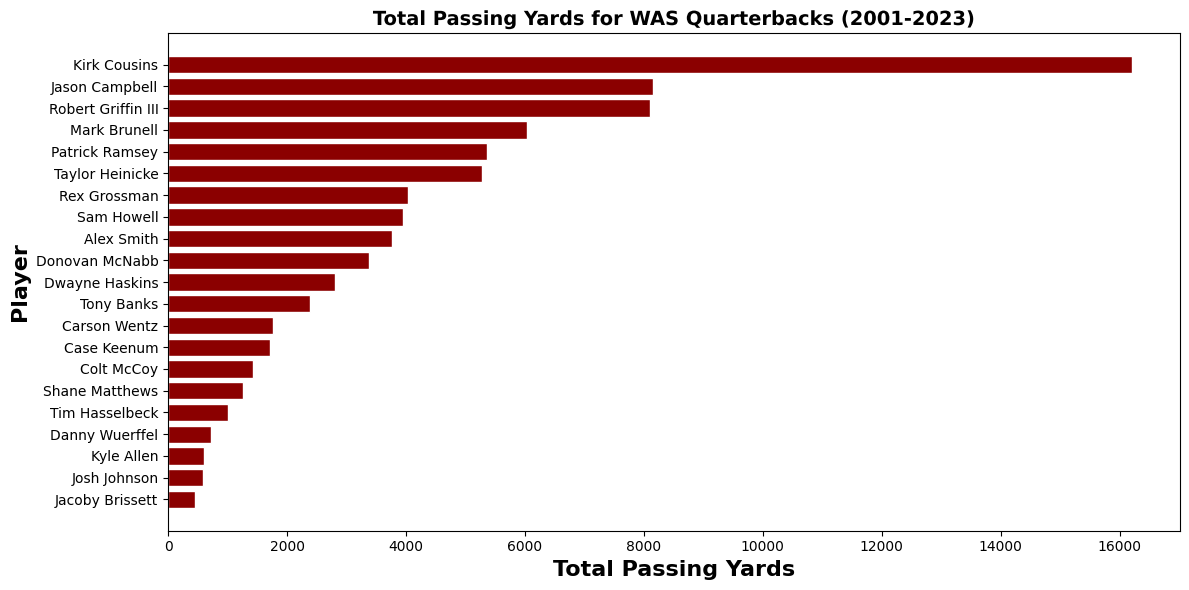

In [19]:
# Filter the DataFrame
was_players = df[(df['Tm'] == 'WAS') & (df['TD'] >= 3) & ~((df['Player'] == 'Sam Howell') & (df['Year'] == 2007))]

# Group data by player and calculate total passing yards for each player
total_yards_by_player = was_players.groupby('Player')['Yds'].sum()

# Sort the data in descending order
total_yards_by_player = total_yards_by_player.sort_values(ascending=True)

# Create the horizontal bar graph
plt.figure(figsize=(12, 6))
bars = plt.barh(total_yards_by_player.index, total_yards_by_player.values, color='darkred', edgecolor='white', linewidth=1)

# Customize fonts for a sporty look
plt.ylabel("Player", fontweight='bold', fontsize=16, fontname='Arial') # Example sporty font: Arial
plt.xlabel("Total Passing Yards", fontweight='bold', fontsize=16)
plt.title("Total Passing Yards for WAS Quarterbacks (2001-2023)", fontweight='bold', fontsize=16, fontname='Arial')

# Add a text effect to the title
title = plt.title("Total Passing Yards for WAS Quarterbacks (2001-2023)", fontweight='bold', fontsize=14, fontname='Arial')
title.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'), path_effects.Normal()])

plt.tight_layout()
plt.show()

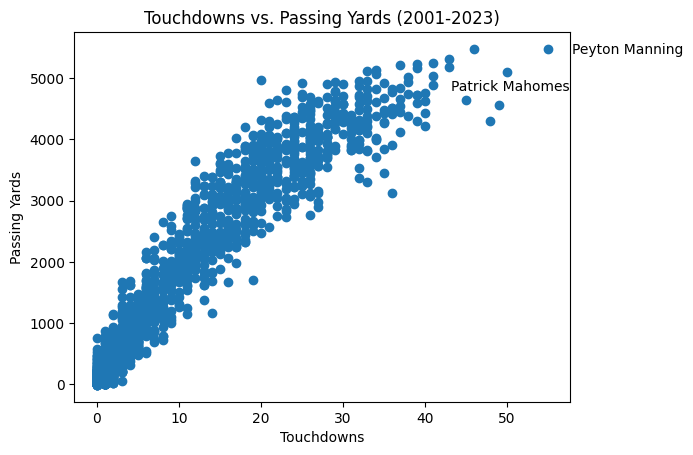

In [20]:
plt.scatter(df['TD'], df['Yds']) # Access 'Int' and 'Rate' columns using df['column_name']
plt.xlabel("Touchdowns") # Label the x-axis
plt.ylabel("Passing Yards") # Label the y-axis
plt.title("Touchdowns vs. Passing Yards (2001-2023)") # Add a title
plt.text(58, 5400, 'Peyton Manning')
plt.text(43.2, 4800, 'Patrick Mahomes')
plt.show()

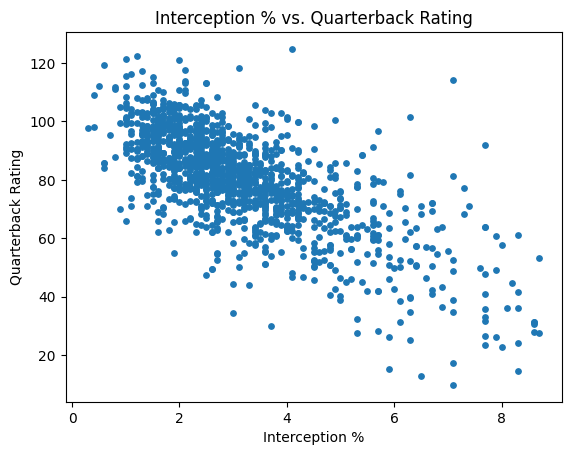

In [21]:
# Calculate the Interquartile Range (IQR) for 'Int'
Q1 = df['Int%'].quantile(0.25)
Q3 = df['Int%'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outlier detection
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter out the outlier based on 'Int'
filtered_df = df[(df['Int%'] >= lower_bound) & (df['Int%'] <= upper_bound)]

# Filter out data points with 0 interceptions
filtered_df2 = filtered_df[filtered_df['Int%'] != 0]

# Create the scatterplot with the filtered data
plt.scatter(filtered_df2['Int%'], filtered_df2['Rate'], s=15)
plt.xlabel("Interception %")
plt.ylabel("Quarterback Rating")
plt.title("Interception % vs. Quarterback Rating")
plt.show()

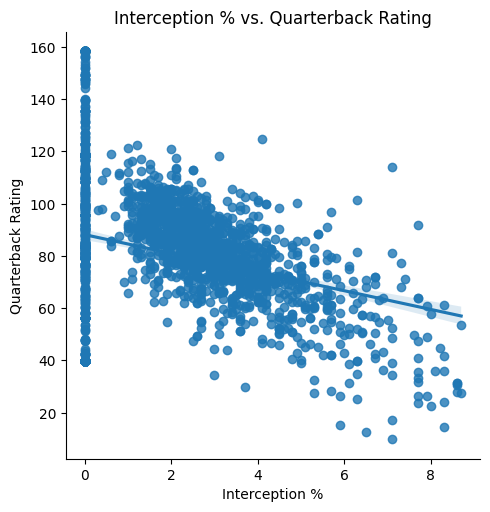

In [22]:
sns.lmplot(x='Int%', y='Rate', data=filtered_df)
plt.xlabel("Interception %")
plt.ylabel("Quarterback Rating")
plt.title("Interception % vs. Quarterback Rating")
plt.show()

In [25]:
correlation = filtered_df2['Int%'].corr(df['Rate'])
print(f"Correlation between Int% and Rate: {correlation:.2f}")

Correlation between Int% and Rate: -0.70


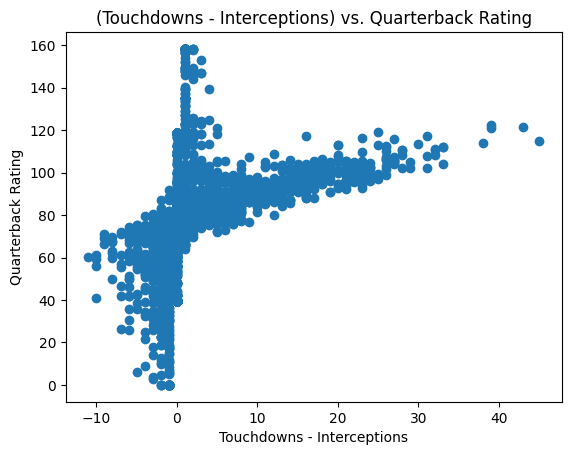

In [23]:
plt.scatter(df['TD-Int'], df['Rate']) # Access 'Int' and 'Rate' columns using df['column_name']
plt.xlabel("Touchdowns - Interceptions") # Label the x-axis
plt.ylabel("Quarterback Rating") # Label the y-axis
plt.title("(Touchdowns - Interceptions) vs. Quarterback Rating") # Add a title
plt.show()

In [26]:
filtered_df_all_starts = df[(df['TD'] >= 5)]  # Keep the touchdown condition

Text(0.5, 1.0, 'Touchdowns Vs Quarterback Ratings for NFC East Teams (2001-2023)')

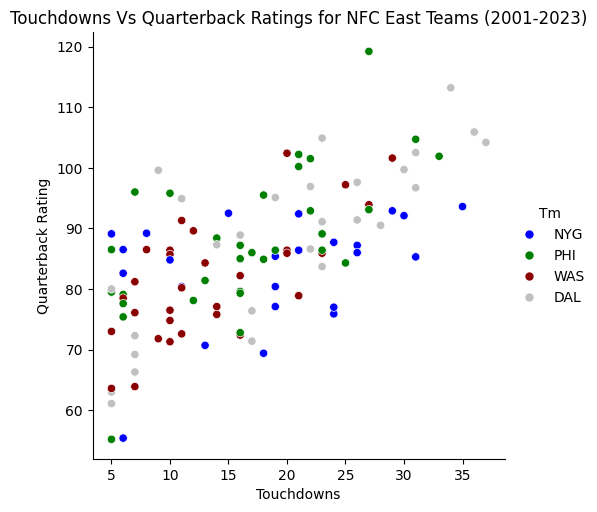

In [32]:
# Define a custom color palette
team_colors = {
    'NYG': 'blue',
    'PHI': 'green',
    'DAL': 'silver',
    'WAS': 'darkred'
}

sns.relplot(x='TD', y='Rate', hue='Tm', data=nfc_east, kind='scatter', palette=team_colors)
plt.xlabel("Touchdowns")
plt.ylabel("Quarterback Rating")
plt.title("Touchdowns Vs Quarterback Ratings for NFC East Teams (2001-2023)")

Nonparametric Inference of All NFL Teams Passing Yards and
Random Sampling 10% of the Data

In [34]:
# 1. Create a sample of the original data (e.g., 10% of the data)
sample_size = int(0.10 * len(df))  # 10% of the original data
sample_df = df.sample(n=sample_size, replace=False)  # Sampling without replacement

# 2. Group data by team and calculate total passing yards for the sample
team_total_yards_sample = sample_df.groupby('Tm')['Yds'].sum()

# 3. Function to calculate the median team based on passing yards (unchanged)
def get_median_team(data):
    sorted_teams = data.sort_values(ascending=False).index
    median_index = len(sorted_teams) // 2
    return sorted_teams[median_index]

# 4. Bootstrapping from the sample
n_iterations = 1000  # Number of bootstrap iterations
median_teams = []
median_yards = []  # Store median passing yards for each iteration

for _ in range(n_iterations):
    # Resample the sample data with replacement
    resampled_data = team_total_yards_sample.sample(frac=1, replace=True)
    # Calculate the median team for the resampled data
    median_team = get_median_team(resampled_data)
    median_teams.append(median_team)
    # Calculate and store median yards
    median_yards.append(resampled_data.median())

# 5. Calculate the confidence interval for median passing yards
confidence_level = 0.95
lower_bound = np.percentile(median_yards, (1 - confidence_level) / 2 * 100)
upper_bound = np.percentile(median_yards, (1 + confidence_level) / 2 * 100)

# 6. Print the results (using the original team_total_yards for the estimated median team)
print(f"Estimated Median Team (from original data): {get_median_team(df.groupby('Tm')['Yds'].sum())}")
print(f"{confidence_level * 100:.0f}% Confidence Interval for Median Passing Yards (from sample): [{lower_bound}, {upper_bound}]")

Estimated Median Team (from original data): WAS
95% Confidence Interval for Median Passing Yards (from sample): [6084.0, 10835.0]
